<a href="https://www.kaggle.com/code/anouartayi/digit-recognizer?scriptVersionId=151192729" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib

## 1-Data

In [2]:
data_train_path='../input/digit-recognizer/train.csv'
data=pd.read_csv(data_train_path)

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data.shape

(42000, 785)

In [5]:
dataset=data.copy()

In [6]:
dataset.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
y=dataset.pop('label')

In [8]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
X_train,X_test,y_train,y_test=train_test_split(dataset,y,random_state=0)

In [11]:
X_train.shape

(31500, 784)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler=MinMaxScaler()

In [14]:
X_scaled=scaler.fit_transform(X_train)

In [15]:
X_test_scaled=scaler.transform(X_test)

## 2-Model 

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [17]:
models=[KNeighborsClassifier(n_neighbors=6),RandomForestClassifier(),SVC()]

In [18]:
for model in models:
    model.fit(X_scaled,y_train)
    y_pred=model.predict(X_test_scaled)
    print(accuracy_score(y_pred,y_test))

0.9662857142857143
0.963047619047619
0.9739047619047619


In [19]:
accuracy_score(y_pred,y_test)

0.9739047619047619

## 3-Test 

In [20]:
data_test_path='../input/digit-recognizer/test.csv'
testset=pd.read_csv(data_test_path)

In [21]:
testset=scaler.transform(testset)

In [22]:
test=np.array(testset)

In [23]:
a=test[0]

In [24]:
c=a.reshape((1,len(a)))

In [25]:
c.shape

(1, 784)

In [26]:
c=scaler.transform(c)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [27]:
b=c.reshape((28,-1))

In [28]:
b.shape

(28, 28)

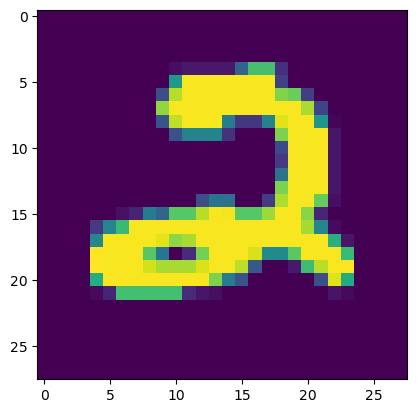

In [29]:
plt.imshow(b)

In [30]:
model.predict(c)

array([5])

In [31]:
output=model.predict(testset)

## 4-Submission

In [32]:
ImageId=np.array([i for i in range(1,len(output)+1)])

In [33]:
submission=pd.DataFrame({'ImageId':ImageId,'Label':output})

In [34]:
submission.to_csv('/kaggle/working/submission.csv',index=False)

In [35]:
submission_path='/kaggle/working/submission.csv'
pd.read_csv(submission_path)

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


y_pred=model.predict(X_test_scaled)

In [36]:
model

SVC()

In [37]:
joblib.dump(model, 'svm_digit_recognizer_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']